In [ ]:
!kaggle datasets download -d tunguz/online-retail

Dataset URL: https://www.kaggle.com/datasets/tunguz/online-retail
License(s): CC0-1.0
  0% 0.00/7.13M [00:00<?, ?B/s]
100% 7.13M/7.13M [00:00<00:00, 82.0MB/s]


In [ ]:
# Optionally, unzip and read data
import pandas as pd
import zipfile

# Unzip if necessary
with zipfile.ZipFile("/content/online-retail.zip", 'r') as zip_ref:
    zip_ref.extractall()

In [ ]:
# Define the file path
filepath = '/content/Online_Retail.csv'

# Read the CSV file, specifying the encoding
df = pd.read_csv(filepath, encoding='latin1') # Try 'latin1' encoding, a common encoding for European data

In [ ]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom


In [ ]:
df.shape

(541909, 8)

## Data Pre-Processing and EDA

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [ ]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


### Data Cleaning

In [ ]:
# Handling missing values
df.dropna(subset=['CustomerID'], inplace=True)  # Remove rows with missing CustomerID

# Remove duplicates
df.drop_duplicates(inplace=True)

# Convert necessary columns to appropriate data types
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Handling negative quantities (assuming they represent returns so right now we focus only transaction that customer actual recieve)
df = df[df['Quantity'] > 0]

# Handling outliers in the 'UnitPrice' column
df = df[(df['UnitPrice'] > 0) & (df['UnitPrice'] < df['UnitPrice'].quantile(0.99))]

# Save cleaned data
df_cleaned = df.copy()

<ipython-input-8-d6ca92873dbb>:8: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])


In [ ]:
df_cleaned.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


### Data Transformation

In [ ]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Creating a new feature: TotalPrice = Quantity * UnitPrice
df_cleaned['TotalPrice'] = df_cleaned['Quantity'] * df_cleaned['UnitPrice']

# Encoding 'Country' as it's a categorical variable
label_encoder = LabelEncoder()
df_cleaned['Country_encoded'] = label_encoder.fit_transform(df_cleaned['Country'])

# Scaling the 'Quantity', 'UnitPrice', and 'TotalPrice' features
scaler = StandardScaler()
df_cleaned[['Quantity', 'UnitPrice', 'TotalPrice']] = scaler.fit_transform(df_cleaned[['Quantity', 'UnitPrice', 'TotalPrice']])

In [ ]:
df_cleaned.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,Country_encoded
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,-0.039944,2010-12-01 08:26:00,-0.054367,17850.0,United Kingdom,-0.021962,35
1,536365,71053,WHITE METAL LANTERN,-0.039944,2010-12-01 08:26:00,0.286935,17850.0,United Kingdom,-0.005479,35
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,-0.028931,2010-12-01 08:26:00,0.026896,17850.0,United Kingdom,-0.000050,35
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,-0.039944,2010-12-01 08:26:00,0.286935,17850.0,United Kingdom,-0.005479,35
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,-0.039944,2010-12-01 08:26:00,0.286935,17850.0,United Kingdom,-0.005479,35


### EDA

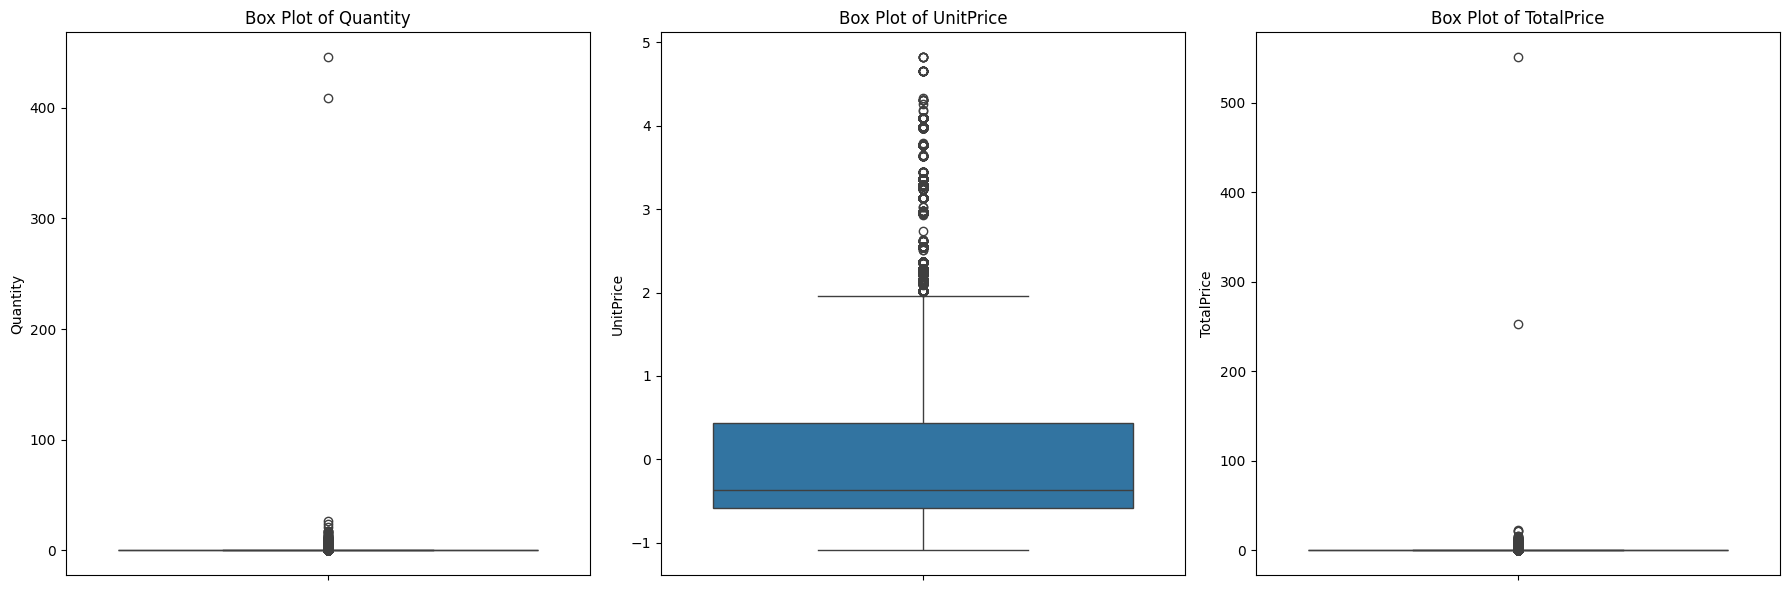

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

sns.boxplot(y=df_cleaned['Quantity'], ax=axs[0])
axs[0].set_title('Box Plot of Quantity')

sns.boxplot(y=df_cleaned['UnitPrice'], ax=axs[1])
axs[1].set_title('Box Plot of UnitPrice')

sns.boxplot(y=df_cleaned['TotalPrice'], ax=axs[2])
axs[2].set_title('Box Plot of TotalPrice')

plt.tight_layout()
plt.show()

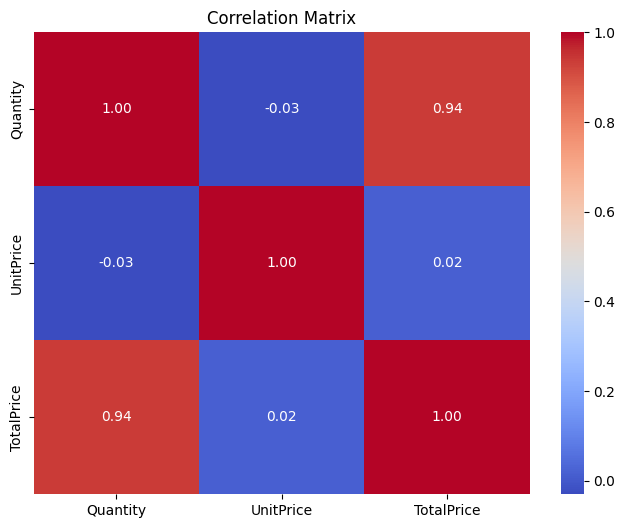

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(df_cleaned[['Quantity', 'UnitPrice', 'TotalPrice']].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

### Removing Outlies using Z score

In [ ]:
from scipy.stats import zscore

df_cleaned['Quantity_zscore'] = zscore(df_cleaned['Quantity'])
df_cleaned['UnitPrice_zscore'] = zscore(df_cleaned['UnitPrice'])
df_cleaned['TotalPrice_zscore'] = zscore(df_cleaned['TotalPrice'])

threshold = 3

# Filter out outliers
df_cleaned = df_cleaned[(df_cleaned['Quantity_zscore'].abs() < threshold) &
                            (df_cleaned['UnitPrice_zscore'].abs() < threshold) &
                            (df_cleaned['TotalPrice_zscore'].abs() < threshold)]

df_cleaned.drop(columns=['Quantity_zscore', 'UnitPrice_zscore', 'TotalPrice_zscore'], inplace=True)

<ipython-input-14-92937b52964a>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned.drop(columns=['Quantity_zscore', 'UnitPrice_zscore', 'TotalPrice_zscore'], inplace=True)


### EDA after removing outlier

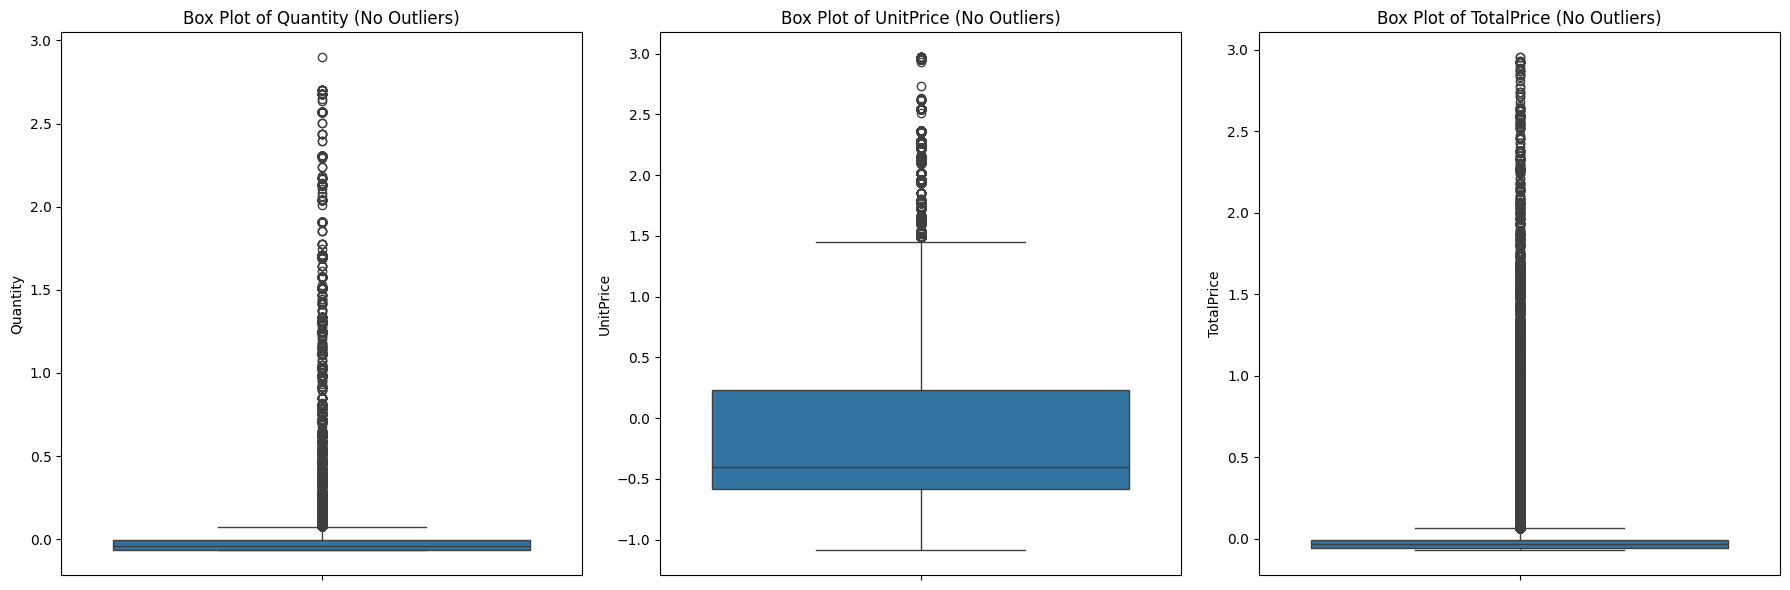

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

sns.boxplot(y=df_cleaned['Quantity'], ax=axs[0])
axs[0].set_title('Box Plot of Quantity (No Outliers)')

sns.boxplot(y=df_cleaned['UnitPrice'], ax=axs[1])
axs[1].set_title('Box Plot of UnitPrice (No Outliers)')

sns.boxplot(y=df_cleaned['TotalPrice'], ax=axs[2])
axs[2].set_title('Box Plot of TotalPrice (No Outliers)')

plt.tight_layout()
plt.show()

## Clustering Algoritm Implementation

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Selecting features for clustering
X = df_cleaned[['Quantity', 'UnitPrice', 'TotalPrice']]

kmeans = KMeans(n_clusters=5, n_init=10, random_state=42)
clusters = kmeans.fit_predict(X)

df_cleaned['Cluster'] = clusters

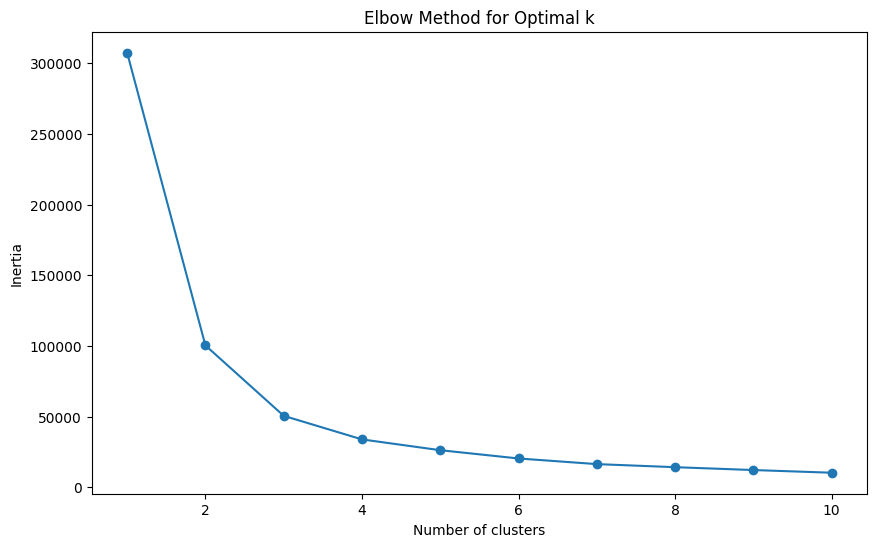

In [ ]:
# Finding the optimal number of clusters using the Elbow Method
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# Plotting the Elbow Curve
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [ ]:
#optimum k = 3
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X)
df_cleaned['Cluster'] = clusters

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


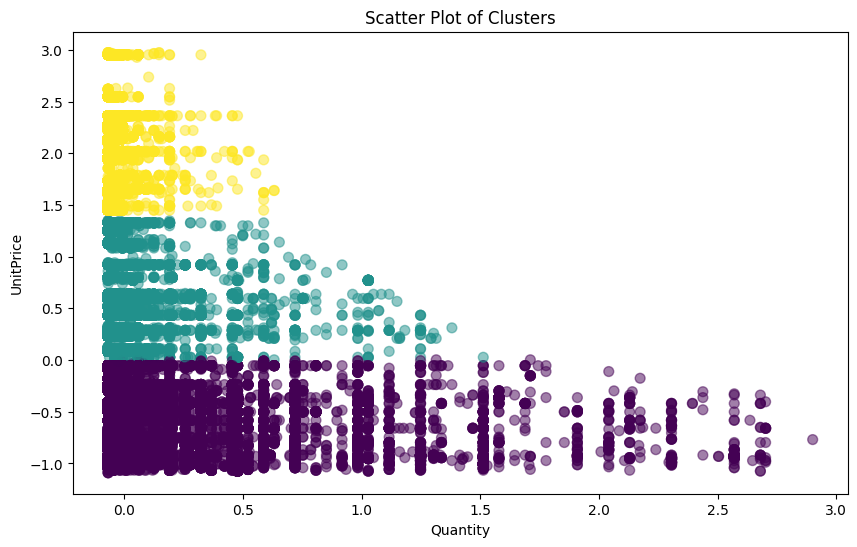

In [ ]:
# Scatter plot of the clusters
plt.figure(figsize=(10, 6))
plt.scatter(X['Quantity'], X['UnitPrice'], c=clusters, cmap='viridis', marker='o', s=50, alpha=0.5)
plt.title('Scatter Plot of Clusters')
plt.xlabel('Quantity')
plt.ylabel('UnitPrice')
plt.show()


In [ ]:
"""import seaborn as sns

# Adding cluster labels to the dataframe
df_plot = df_cleaned[['Quantity', 'UnitPrice', 'TotalPrice', 'Cluster']]

# Pairplot
sns.pairplot(df_plot, hue='Cluster', palette='viridis')
plt.suptitle('Pair Plot of Features Colored by Cluster', y=1.02)
plt.show()"""


"import seaborn as sns\n\n# Adding cluster labels to the dataframe\ndf_plot = df_cleaned[['Quantity', 'UnitPrice', 'TotalPrice', 'Cluster']]\n\n# Pairplot\nsns.pairplot(df_plot, hue='Cluster', palette='viridis')\nplt.suptitle('Pair Plot of Features Colored by Cluster', y=1.02)\nplt.show()"

## Evaluation of Result
### PCA

In [ ]:
from sklearn.decomposition import PCA
import numpy as np
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.model_selection import train_test_split

def sample_and_analyze(X, sample_size=200000, n_components=2, random_state=42):
    # Sample the dataset
    if len(X) > sample_size:
        X_sample, _ = train_test_split(X, train_size=sample_size, random_state=random_state)
    else:
        X_sample = X

    # Apply PCA
    pca = PCA(n_components=n_components)
    X_reduced = pca.fit_transform(X_sample)

    print(f"Explained variance ratio: {np.sum(pca.explained_variance_ratio_):.4f}")
    # Compare with different algorithms
    kmeans = KMeans(n_clusters=3, random_state=random_state)
    kmeans_clusters = kmeans.fit_predict(X_reduced)

    dbscan = DBSCAN(eps=0.5, min_samples=5)
    dbscan_clusters = dbscan.fit_predict(X_reduced)

    hierarchical = AgglomerativeClustering(n_clusters=3)
    hier_clusters = hierarchical.fit_predict(X_reduced)

    # Evaluation
    def safe_score(X, labels, scorer):
        if len(np.unique(labels)) > 1:
            return scorer(X, labels)
        return np.nan

    results = {
        'Clustering Method': ['K-Means', 'DBSCAN', 'Hierarchical'],
        'Silhouette Score': [
            safe_score(X_reduced, kmeans_clusters, silhouette_score),
            safe_score(X_reduced, dbscan_clusters, silhouette_score),
            safe_score(X_reduced, hier_clusters, silhouette_score)
        ],
        'Davies-Bouldin Index': [
            safe_score(X_reduced, kmeans_clusters, davies_bouldin_score),
            safe_score(X_reduced, dbscan_clusters, davies_bouldin_score),
            safe_score(X_reduced, hier_clusters, davies_bouldin_score)
        ]
    }

    return pd.DataFrame(results)

results_df = sample_and_analyze(X, sample_size=10000, n_components=2)

Explained variance ratio: 0.9948


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [ ]:
results_df

,Clustering Method,Silhouette Score,Davies-Bouldin Index
0,K-Means,0.603860,0.541175
1,DBSCAN,0.677815,0.650294
2,Hierarchical,0.638558,0.455025


# Market Basket Analysis

In [ ]:
# Define the file path
filepath = '/content/Online_Retail.csv'

# Read the CSV file, specifying the encoding
df1 = pd.read_csv(filepath, encoding='latin1') # Try 'latin1' encoding, a common encoding for European data

In [ ]:
df1.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


### Data Cleaning

In [ ]:
df1.drop_duplicates(inplace=True)
df1['InvoiceDate'] = pd.to_datetime(df1['InvoiceDate'])

# Convert 'Quantity' and 'UnitPrice' to numeric, replacing invalid entries with NaN
df1['Quantity'] = pd.to_numeric(df1['Quantity'], errors='coerce')
df1['UnitPrice'] = pd.to_numeric(df1['UnitPrice'], errors='coerce')

# Filter out rows with NaN values in Quantity or UnitPrice
df1 = df1.dropna(subset=['Quantity', 'UnitPrice'])

df1_positive = df1[df1['Quantity'] > 0]
df1_positive = df1_positive[df1_positive['UnitPrice'] > 0]
df1_positive = df1_positive[~df1_positive['InvoiceNo'].astype(str).str.startswith('C')]
df1_cleaned = df1_positive.copy()

# Print basic information
print(f"Original data shape: {df1.shape}")
print(f"Cleaned data shape: {df1_cleaned.shape}")
print(f"Number of unique transactions: {df1_cleaned['InvoiceNo'].nunique()}")
print(f"Number of unique products: {df1_cleaned['StockCode'].nunique()}")

<ipython-input-25-84f35fea8e59>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df1['InvoiceDate'] = pd.to_datetime(df1['InvoiceDate'])


Original data shape: (536641, 8)
Cleaned data shape: (524878, 8)
Number of unique transactions: 19960
Number of unique products: 3922


## EDA

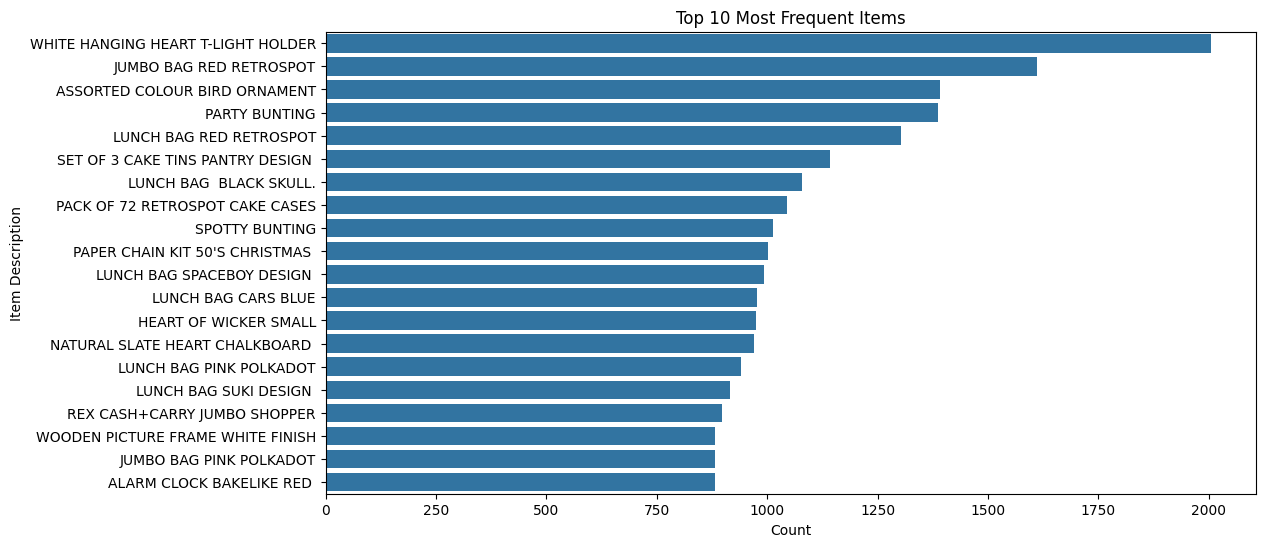

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
# 1. Top 20 most frequent items
top_items = df_cleaned['Description'].value_counts().head(20)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_items.values, y=top_items.index)
plt.title('Top 10 Most Frequent Items')
plt.xlabel('Count')
plt.ylabel('Item Description')
plt.show()

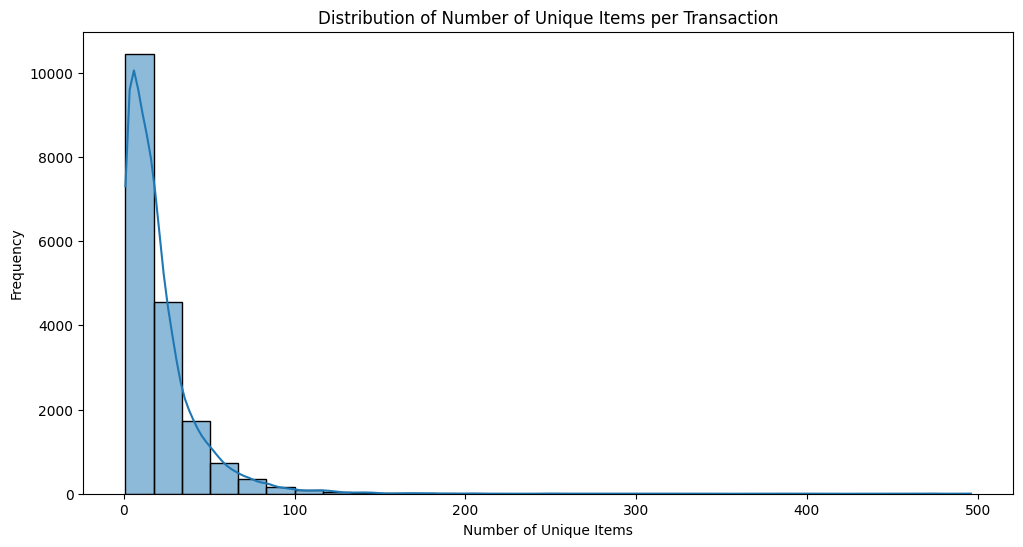

In [ ]:
# 2. Distribution of items per transaction
items_per_transaction = df_cleaned.groupby('InvoiceNo')['Description'].nunique()

plt.figure(figsize=(12, 6))
sns.histplot(items_per_transaction, kde=True, bins=30)
plt.title('Distribution of Number of Unique Items per Transaction')
plt.xlabel('Number of Unique Items')
plt.ylabel('Frequency')
plt.show()

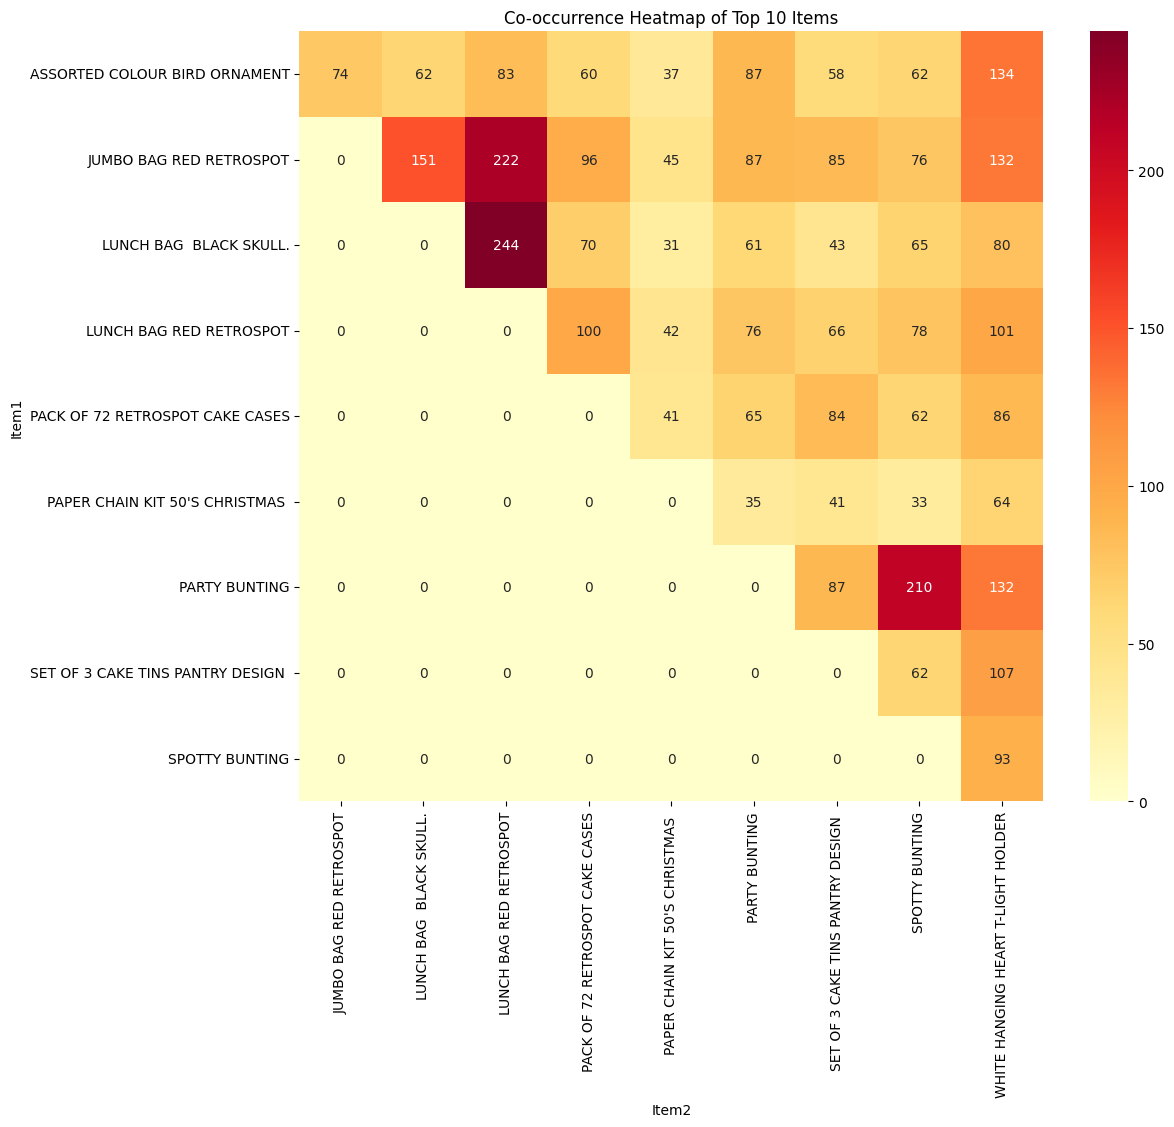

In [ ]:
# 3. Heatmap of top 10 item co-occurrences
def get_item_pairs(df):
    return df['Description'].tolist()

top_10_items = df_cleaned['Description'].value_counts().nlargest(10).index
df_top_10 = df_cleaned[df_cleaned['Description'].isin(top_10_items)]

item_pairs = df_top_10.groupby('InvoiceNo').apply(get_item_pairs)
from itertools import combinations
co_occurrence = {}

for pair in item_pairs:
    for item1, item2 in combinations(pair, 2):
        if item1 < item2:  # Avoid duplicates
            co_occurrence[(item1, item2)] = co_occurrence.get((item1, item2), 0) + 1

co_occurrence_df = pd.DataFrame([(item1, item2, count) for (item1, item2), count in co_occurrence.items()],
                                columns=['Item1', 'Item2', 'Count'])
co_occurrence_matrix = co_occurrence_df.pivot(index='Item1', columns='Item2', values='Count').fillna(0)

plt.figure(figsize=(12, 10))
sns.heatmap(co_occurrence_matrix, annot=True, cmap='YlOrRd', fmt='g')
plt.title('Co-occurrence Heatmap of Top 10 Items')
plt.show()

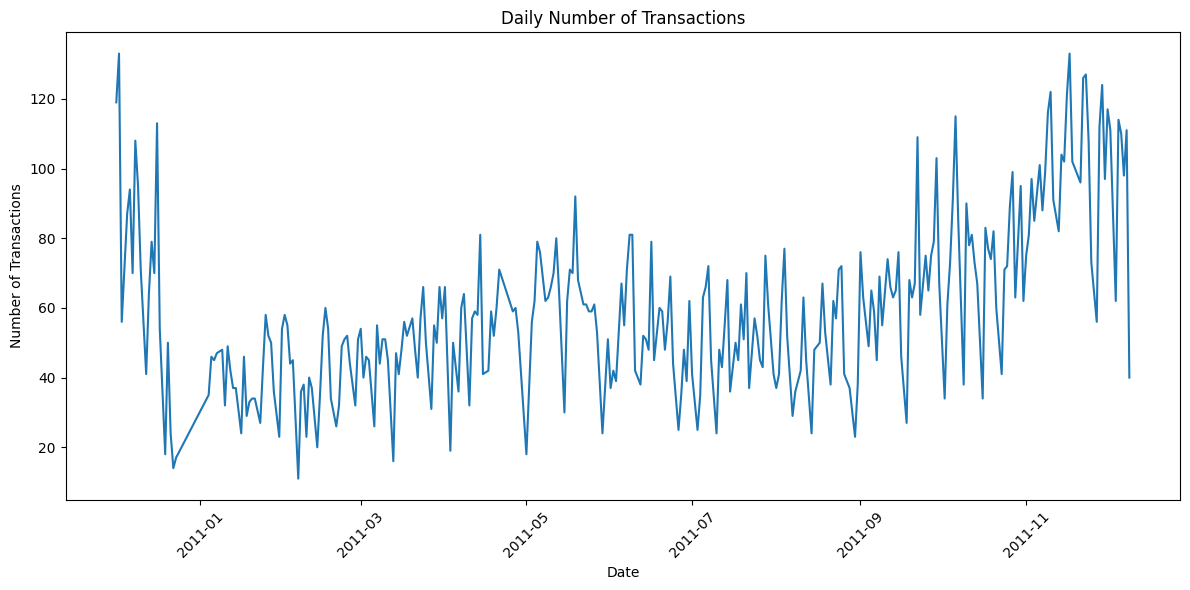

In [ ]:
# 4. Time series of daily transaction count
daily_transactions = df_cleaned.groupby(df_cleaned['InvoiceDate'].dt.date)['InvoiceNo'].nunique()

plt.figure(figsize=(12, 6))
plt.plot(daily_transactions.index, daily_transactions.values)
plt.title('Daily Number of Transactions')
plt.xlabel('Date')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Clustering Algorithm Implementation

In [ ]:
basket = df1_cleaned.groupby(['InvoiceNo', 'Description'])['Quantity'].sum().unstack().reset_index().fillna(0)

# Ensure all columns except 'InvoiceNo' are numeric
for col in basket.columns:
    if col != 'InvoiceNo':
        basket[col] = pd.to_numeric(basket[col], errors='coerce')

basket = basket.fillna(0)

# encode the basket
basket_encoded = basket.copy()
for col in basket_encoded.columns:
    if col != 'InvoiceNo':
        basket_encoded[col] = (basket_encoded[col] > 0).astype(int)

print("Shape of encoded basket for market basket analysis:", basket_encoded.shape)
print("Number of unique products in encoded basket:", basket_encoded.shape[1] - 1)


Shape of encoded basket for market basket analysis: (19960, 4027)
Number of unique products in encoded basket: 4026


In [ ]:
import pandas as pd
from mlxtend.frequent_patterns import fpgrowth, association_rules
import time

def run_fpgrowth_analysis(data, min_support, min_confidence):
    start_time = time.time()
    frequent_itemsets = fpgrowth(data, min_support=min_support, use_colnames=True)
    rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=min_confidence)
    execution_time = time.time() - start_time
    # Compute leverage
    leverage = rules['support'] - (rules['antecedent support'] * rules['consequent support'])
    # Compute Zhang's metric
    zhangs_metric = (rules['confidence'] - rules['antecedent support']) / (1 - rules['antecedent support'])
    return frequent_itemsets, rules, len(frequent_itemsets), len(rules), execution_time, leverage, zhangs_metric

def parameter_tuning(data, min_support_range, min_confidence_range):
    results = []
    for min_support in min_support_range:
        for min_confidence in min_confidence_range:
            _, _, itemsets_count, rules_count, exec_time, leverage, zhangs_metric = run_fpgrowth_analysis(data, min_support, min_confidence)
            results.append({
                'min_support': min_support,
                'min_confidence': min_confidence,
                'itemsets_count': itemsets_count,
                'rules_count': rules_count,
                'execution_time': exec_time,
                'leverage': leverage,
                'zhangs_metric': zhangs_metric
            })
    return pd.DataFrame(results)

# Remove 'InvoiceNo'
basket_encoded = basket_encoded.drop('InvoiceNo', axis=1, errors='ignore')

# Convert all columns to boolean (True/False)
for col in basket_encoded.columns:
    basket_encoded[col] = basket_encoded[col].astype(bool)

# Select top 1000 most frequent items
item_frequencies = basket_encoded.sum().sort_values(ascending=False)
top_items = item_frequencies.head(1000).index
reduced_basket = basket_encoded[top_items]

# Reduced parameter ranges
min_support_range = [0.01, 0.05, 0.1]
min_confidence_range = [0.3, 0.5, 0.7]

# Perform parameter tuning
tuning_results = parameter_tuning(reduced_basket, min_support_range, min_confidence_range)

# Find the optimal parameters
optimal_params = tuning_results.loc[tuning_results['rules_count'].idxmax()]
print(optimal_params)

# Run FP-Growth with optimal parameters and get the final rules
_, final_rules, _, _, _, leverage, zhangs_metric = run_fpgrowth_analysis(reduced_basket,
                                                                         optimal_params['min_support'],
                                                                         optimal_params['min_confidence'])

# Display top 10 rules by lift
top_10_rules_df = final_rules.assign(
    leverage=leverage,
    zhangs_metric=zhangs_metric
).sort_values('lift', ascending=False).head(10)[[
    'antecedents', 'consequents', 'support', 'confidence', 'lift', 'leverage', 'conviction', 'zhangs_metric'
]]

# Print the final DataFrame
print("\nTop 10 Rules by Lift:")
print(top_10_rules_df.to_string(index=True))


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


min_support                                                    0.01
min_confidence                                                  0.3
itemsets_count                                                 1902
rules_count                                                    1824
execution_time                                            10.821826
leverage          0       0.011037
1       0.011037
2       0.01...
zhangs_metric     0       0.339205
1       0.480219
2       0.37...
Name: 0, dtype: object

Top 10 Rules by Lift:
                                     antecedents                                  consequents   support  confidence       lift  leverage  conviction  zhangs_metric
817  (HERB MARKER PARSLEY, HERB MARKER ROSEMARY)                          (HERB MARKER THYME)  0.010170    0.944186  79.518791  0.010042   17.703929       0.943578
822                          (HERB MARKER THYME)  (HERB MARKER PARSLEY, HERB MARKER ROSEMARY)  0.010170    0.856540  79.518791  0.010042    6.895504  

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


Comparison of Algorithms:
   num_rules  avg_support  avg_confidence  avg_lift   max_lift  \
0      208.0       0.0247        0.493231  8.857503  28.046313   
1      208.0       0.0247        0.493231  8.857503  28.046313   

   execution_time  algorithm  
0        0.777413  FP-Growth  
1        2.001097    Apriori  


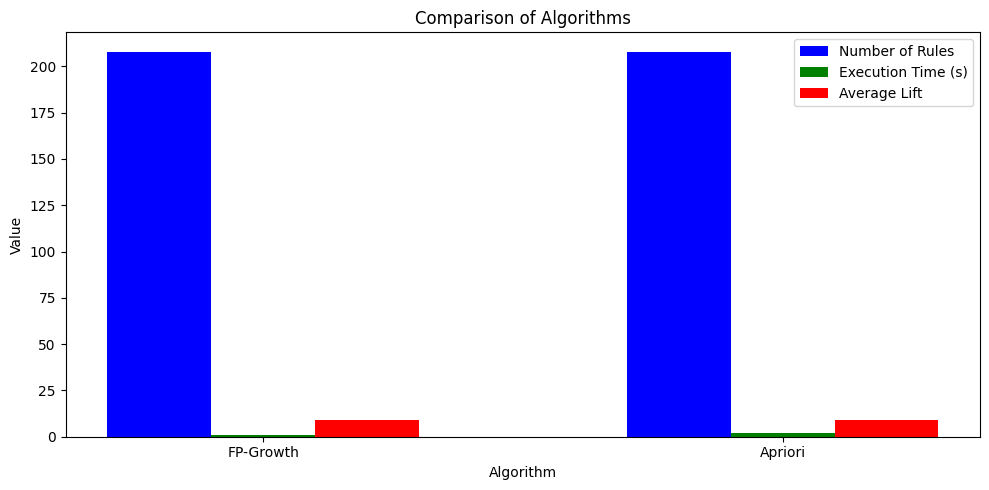


Top 5 Rules by Lift for the Best Algorithm:
                                         antecedents  \
0                 WOODEN STAR CHRISTMAS SCANDINAVIAN   
1                WOODEN HEART CHRISTMAS SCANDINAVIAN   
2  GREEN REGENCY TEACUP AND SAUCER, ROSES REGENCY...   
3                     PINK REGENCY TEACUP AND SAUCER   
4                    GREEN REGENCY TEACUP AND SAUCER   

                                         consequents   support  confidence  \
0                WOODEN HEART CHRISTMAS SCANDINAVIAN  0.020040    0.781250   
1                 WOODEN STAR CHRISTMAS SCANDINAVIAN  0.020040    0.719424   
2                     PINK REGENCY TEACUP AND SAUCER  0.027054    0.681818   
3  GREEN REGENCY TEACUP AND SAUCER, ROSES REGENCY...  0.027054    0.706806   
4  PINK REGENCY TEACUP AND SAUCER, ROSES REGENCY ...  0.027054    0.527344   

        lift  conviction  
0  28.046313    4.444088  
1  28.046313    3.472679  
2  17.812946    3.022559  
3  17.812946    3.275379  
4  17.426790  

In [ ]:
import pandas as pd
import time
from mlxtend.frequent_patterns import fpgrowth, apriori, association_rules
import matplotlib.pyplot as plt

def run_algorithm(data, min_support, min_confidence, algorithm):
    start_time = time.time()
    if algorithm == 'fpgrowth':
        frequent_itemsets = fpgrowth(data, min_support=min_support, use_colnames=True)
    elif algorithm == 'apriori':
        frequent_itemsets = apriori(data, min_support=min_support, use_colnames=True)
    else:
        raise ValueError("Algorithm must be either 'fpgrowth' or 'apriori'")

    rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=min_confidence)
    execution_time = time.time() - start_time
    return rules, execution_time

def evaluate_rules(rules):
    return {
        'num_rules': len(rules),
        'avg_support': rules['support'].mean(),
        'avg_confidence': rules['confidence'].mean(),
        'avg_lift': rules['lift'].mean(),
        'max_lift': rules['lift'].max()
    }

# Remove 'InvoiceNo' column if it exists
basket_encoded = basket_encoded.drop('InvoiceNo', axis=1, errors='ignore')

for col in basket_encoded.columns:
    basket_encoded[col] = pd.to_numeric(basket_encoded[col], errors='coerce').fillna(0).astype(int)

# Select top 500 most frequent items
item_frequencies = basket_encoded.sum().sort_values(ascending=False)
top_items = item_frequencies.head(500).index
data_encoded = basket_encoded[top_items]

# Use a sample of the data
data_encoded = data_encoded.sample(frac=0.25, random_state=42)

# Use the best parameters from previous tuning
best_min_support = 0.02
best_min_confidence = 0.3

# Run algorithms
fpgrowth_rules, fpgrowth_time = run_algorithm(data_encoded, best_min_support, best_min_confidence, 'fpgrowth')
apriori_rules, apriori_time = run_algorithm(data_encoded, best_min_support, best_min_confidence, 'apriori')

# Evaluate results
results = {
    'FP-Growth': evaluate_rules(fpgrowth_rules),
    'Apriori': evaluate_rules(apriori_rules)
}

results['FP-Growth']['execution_time'] = fpgrowth_time
results['Apriori']['execution_time'] = apriori_time

results_df = pd.DataFrame(results).T
results_df['algorithm'] = results_df.index
results_df = results_df.reset_index(drop=True)

print("Comparison of Algorithms:")
print(results_df)

# Visualize comparison
plt.figure(figsize=(10, 5))
x = range(len(results_df))
width = 0.2

plt.bar([i - width for i in x], results_df['num_rules'], width, label='Number of Rules', color='blue')
plt.bar(x, results_df['execution_time'], width, label='Execution Time (s)', color='green')
plt.bar([i + width for i in x], results_df['avg_lift'], width, label='Average Lift', color='red')

plt.xlabel('Algorithm')
plt.ylabel('Value')
plt.title('Comparison of Algorithms')
plt.xticks(x, results_df['algorithm'])
plt.legend()
plt.tight_layout()
plt.show()

# Display top rules for the best performing algorithm (based on avg_lift)
best_algo = results_df.loc[results_df['avg_lift'].idxmax(), 'algorithm']
if best_algo == 'FP-Growth':
    best_rules = fpgrowth_rules
else:
    best_rules = apriori_rules

top_rules = best_rules.sort_values('lift', ascending=False).head(5)[[
    'antecedents', 'consequents', 'support', 'confidence', 'lift', 'conviction'
]].reset_index(drop=True)

top_rules['antecedents'] = top_rules['antecedents'].apply(lambda x: ', '.join(list(x)))
top_rules['consequents'] = top_rules['consequents'].apply(lambda x: ', '.join(list(x)))

print("\nTop 5 Rules by Lift for the Best Algorithm:")
print(top_rules)

def interpret_rule(rule):
    return f"If a customer buys {rule['antecedents']}, " \
           f"they are {rule['lift']:.2f} times more likely to buy {rule['consequents']}. " \
           f"This rule has a confidence of {rule['confidence']:.2f} and applies to {rule['support']:.2f} of transactions."

print("\nInterpretation of Top Rule:")
top_rule = top_rules.iloc[0]
print(interpret_rule(top_rule))


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
